# Stochastic Model: Results of different #agent values

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results[results.num_robots == 3]
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticAdditive5LackPlanner,50,3.0,1.5,1.0,0.5,269.741730,4.259549,11879.547611,11.371000
1,StochasticAdditive5LackPlanner,100,3.0,1.5,1.0,0.5,264.142157,20.016535,24271.825087,19.089000
2,StochasticAdditive5LackPlanner,200,3.0,1.5,1.0,0.5,266.210411,118.834706,49159.631697,26.936667
3,StochasticAdditive5LackPlanner,300,3.0,1.5,1.0,0.5,261.045370,493.828533,73731.361369,33.273000
4,StochasticAdditive5LackPlanner,400,3.0,1.5,1.0,0.5,271.828903,812.042919,98541.080389,42.167667


In [81]:
planners_names = ['StochasticStaticLackPlanner', 'StochasticAdditive5LackPlanner', 'StochasticIterativePlanner']

colors = ['tab:red', 'tab:brown', 'tab:blue', 'tab:green', 'navajowhite', 'burlywood', 'tab:orange']

planners_results = [results.loc[results['planner'] == name] for name in planners_names]

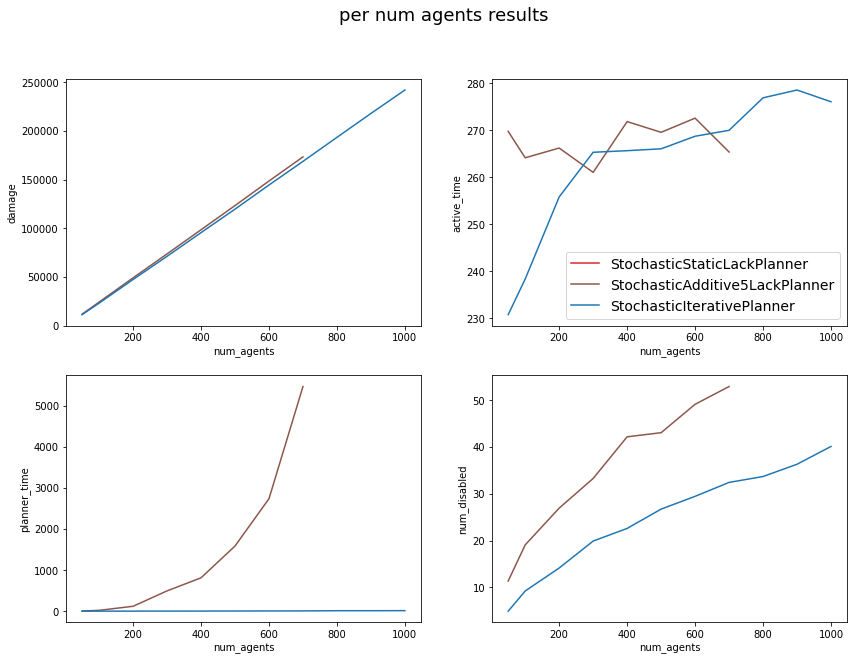

In [82]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

plt.figure(figsize=(14,10))
plt.suptitle('per num agents results', fontsize=18)

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.subplot(2, 2, i+1)
    plt.xlabel(x)
    plt.ylabel(y)
    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]), list(r[y]), c=colors[j])

    if i==1:
        plt.legend(planners_names, fontsize='14')

plt.savefig('./plots/stochastic_num_agents.png')
plt.show()